In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
# #feature extraction using VGG-19
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
#loading in the csv data
df = pd.read_csv('C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\train.csv',error_bad_lines=False)
fashion_dir = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion'
df.head()
from matplotlib import pyplot as plt
import cv2
for i in df.images:
    #print(i)
    imageName = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion\\'+ i
    image = cv2.imread(imageName)
    image = RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    #plt.imshow(image)
    #plt.title('Image')
    #plt.show()
df.nunique()
df.columns
batch_size = 32

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    validation_split=0.20,
    rescale=1.0/255.0,
     horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    validation_split=0.20,
    rescale = 1./255)
training_set = train_generator.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(224,224),
    batch_size=batch_size,
    subset="training"
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(224,224),
    batch_size=batch_size,
    subset="validation"
)

In [ ]:
classes = len(training_set.class_indices)
classes

In [ ]:
#add preprocessing layer to the front of VGG
from keras.applications.vgg19 import VGG19
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)
#we will not train existing weights
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
print(x)
prediction = Dense(classes, activation='sigmoid')(x)
print(prediction,111)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

target 99
[1 2 0 3]


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

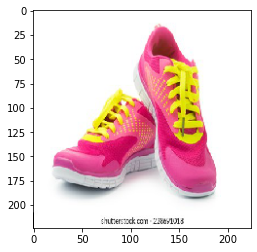

In [86]:
from keras.preprocessing import image
SIZE=224
img = image.load_img('pair-pink-sport-shoes-on-260nw-228691018.jpg', target_size=(SIZE,SIZE,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img.shape
classes = np.array(df.columns[1])
print(classes,99)
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-5:-1]
print(sorted_categories)
#Print classes and corresponding probabilities
# for i in range(10):
#     print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

###################################################

_, acc = model.evaluate(training_set, test_set)
print("Accuracy = ", (acc * 100.0), "%")